In [1]:
from sequence_for_nn import *

In [2]:
container = Container()
container.read_seq("../data/myco_genome.fasta", "fasta")
container.cut_seq(length = 100, start = 0)
container.generate_seq()

container created
read seq from file ../data/myco_genome.fasta, length = 4399916
cuted seq for analysis, length = 100, start = 0, part = 0.0-0.0
generated seq_np


In [3]:
inp = np.random.rand(4, 100)
end = container.seq_np
print(inp.shape)
print(end.shape)

(4, 100)
(4, 100)


In [4]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
from keras import backend as K

Using TensorFlow backend.


In [5]:
input_shape = (4, 100) #batch, steps, channels

In [7]:
model = Sequential()
model.add(Conv1D(32, kernel_size= 3,
                 activation='relu',
                 input_shape=input_shape))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
model.add(UpSampling1D(size = 3))

In [8]:
model.compile(optimizer='adam', loss='mse')

# 2D with pics

In [37]:
from PIL import Image
import numpy as np
import math
import IPython
import matplotlib.pyplot as plt
%matplotlib inline

(64, 64, 3)
(10, 64, 64, 3)


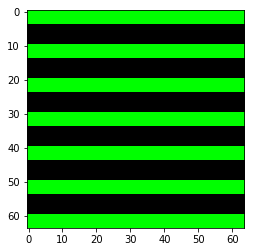

In [41]:
length = 64
array = np.zeros((length, length, 3))

for line in range(0, length, 10):
    array[line:line+4, :, 1] = 1
print(array.shape)

array_image = (array * 255).astype(np.uint8)
#image = Image.fromarray(array_image)
# image.show()
imgplot = plt.imshow(array_image)
# IPython.display.display(IPython.display.Image(image))

array_10 = np.array([array for i in range(10)])
print(array_10.shape)

In [42]:
mask = np.zeros((length, length, 3))
mask.fill(1)
for line in range(10, 50):
    mask[line, 10:50, :] = 0
    
mask_image = (mask * 255).astype(np.uint8)
image = Image.fromarray(mask_image)
image.show()

In [138]:
masked_image = (array * mask * 255).astype(np.uint8)
image = Image.fromarray(masked_image)
image.show()

In [139]:
inp = np.random.rand(length, length, 32)
print(inp.shape)

# for i in np.nditer(inp):
#     i = math.trunc(i * 255)
# image = Image.fromarray(inp.astype(np.uint8))
# image.show()
inp_10 = np.array([inp for i in range(10)])
print(inp_10.shape)

(128, 128, 32)
(10, 128, 128, 32)


In [140]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Dense, Concatenate, concatenate
from keras.layers import Input, Dense
from keras.models import Model

In [141]:
input_shape = (length, length, 32)

input_img = Input(shape=(128, 128, 32))
x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x1 = MaxPooling2D((2, 2), padding='same')(x1) # x1 (64, 64, 16)

x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPooling2D((2, 2), padding='same')(x2) # x2 (32, 32, 8)

x3 = Conv2D(8, (3, 3), activation='relu', padding='same')(x2)
x3 = MaxPooling2D((2, 2), padding='same')(x3) #x3 (16, 16, 8)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional


x97 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
x97 = UpSampling2D((2, 2))(x97) #x97 (32, 32, 8)

x98 = Conv2D(8, (3, 3), activation='relu', padding='same')(concatenate([x97, x2]))
x98 = UpSampling2D((2, 2))(x98) # x98 (64, 64, 8)

x99 = Conv2D(16, (3, 3), activation='relu', padding = "same")(concatenate([x98, x1]))
x99 = UpSampling2D((2, 2))(x99) #x99 (128, 128, 16)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x99)


model = Model(input_img, decoded)


In [146]:
import keras

def customLoss(y_true,y_pred):
    return keras.losses.mean_squared_error(y_true * mask, y_pred * mask)


In [147]:
model.compile(optimizer='adam', loss=customLoss)

In [148]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           (None, 128, 128, 32) 0                                            
__________________________________________________________________________________________________
conv2d_107 (Conv2D)             (None, 128, 128, 16) 4624        input_32[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_46 (MaxPooling2D) (None, 64, 64, 16)   0           conv2d_107[0][0]                 
__________________________________________________________________________________________________
conv2d_108 (Conv2D)             (None, 64, 64, 8)    1160        max_pooling2d_46[0][0]           
__________________________________________________________________________________________________
max_poolin

In [153]:
model.fit(inp_10, array_10, epochs = 400)

Epoch 1/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0418
Epoch 2/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0417
Epoch 3/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0415
Epoch 4/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0414
Epoch 5/400
10/10 [==============================] - 1s 56ms/step - loss: 0.0412
Epoch 6/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0411
Epoch 7/400
10/10 [==============================] - 0s 48ms/step - loss: 0.0409
Epoch 8/400
10/10 [==============================] - 0s 45ms/step - loss: 0.0407
Epoch 9/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0406
Epoch 10/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0404
Epoch 11/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0403
Epoch 12/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0401
Epoch 13/400
10/10 [=====

10/10 [==============================] - 0s 43ms/step - loss: 0.0319
Epoch 102/400
10/10 [==============================] - 0s 40ms/step - loss: 0.0317
Epoch 103/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0315
Epoch 104/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0314
Epoch 105/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0312
Epoch 106/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0310
Epoch 107/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0308
Epoch 108/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0307
Epoch 109/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0305
Epoch 110/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0303
Epoch 111/400
10/10 [==============================] - 0s 41ms/step - loss: 0.0301
Epoch 112/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0299
Epoch 113/400
10/1

Epoch 200/400
10/10 [==============================] - 0s 48ms/step - loss: 0.0158
Epoch 201/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0156
Epoch 202/400
10/10 [==============================] - 0s 46ms/step - loss: 0.0155
Epoch 203/400
10/10 [==============================] - 0s 46ms/step - loss: 0.0153
Epoch 204/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0152
Epoch 205/400
10/10 [==============================] - 0s 46ms/step - loss: 0.0150
Epoch 206/400
10/10 [==============================] - 0s 46ms/step - loss: 0.0148
Epoch 207/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0147
Epoch 208/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0145
Epoch 209/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0144
Epoch 210/400
10/10 [==============================] - 0s 47ms/step - loss: 0.0142
Epoch 211/400
10/10 [==============================] - 0s 46ms/step - loss: 0.0141
Epoc

Epoch 299/400
10/10 [==============================] - 0s 45ms/step - loss: 0.0061
Epoch 300/400
10/10 [==============================] - 0s 45ms/step - loss: 0.0060
Epoch 301/400
10/10 [==============================] - 0s 45ms/step - loss: 0.0059
Epoch 302/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0059
Epoch 303/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0058
Epoch 304/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0057
Epoch 305/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0057
Epoch 306/400
10/10 [==============================] - 0s 44ms/step - loss: 0.0056
Epoch 307/400
10/10 [==============================] - 0s 45ms/step - loss: 0.0055
Epoch 308/400
10/10 [==============================] - 0s 43ms/step - loss: 0.0055
Epoch 309/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0054
Epoch 310/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0053
Epoc

Epoch 398/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0016
Epoch 399/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0016
Epoch 400/400
10/10 [==============================] - 0s 42ms/step - loss: 0.0015


In [154]:
out_10 = model.predict(inp_10)

In [155]:
out_10.shape
out = out_10[1]
out.shape

(128, 128, 3)

In [156]:
out_image = (out * 255).astype(np.uint8)
image = Image.fromarray(out_image)
image.show()